In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tfe.enable_eager_execution()

In [2]:
import numpy as np

In [3]:
real_dtype = tf.float64
cmplx_dtype = tf.complex128

In [4]:
def squared_L2_norm(x):
    """
    Squared L2 norm
    """
    if x.dtype in [tf.float64, tf.float32, tf.float16]:
        return tf.reduce_sum(tf.real(tf.multiply(tf.conj(x), x)))
    elif x.dtype in [tf.complex128, tf.complex64, tf.complex32]:
        return tf.reduce_sum(tf.multiply(x, x))
    
class RidgeModel(object):
  """
  minimize |y - A * x|_2^2 + alpha * |x|_2^2
  """
  def __init__(self, A, y, alpha):
    N1, N2 = A.shape
    assert y.shape == tf.TensorShape([N1])
    
    self.y = y
    self.A = A
    self.alpha = alpha
    self.x = tf.Variable(np.zeros((N2)), dtype=real_dtype)

  def predict_y(self):
    x_reshaped = tf.reshape(self.x, (N2,1))
    return tf.reshape(tf.matmul(self.A, x_reshaped), (N1,))

  def loss(self):
    """
    Compute mean squared error
    """
    y_pre = self.predict_y()
    assert self.y.shape == y_pre.shape
    return (squared_L2_norm(self.y - y_pre) + alpha * squared_L2_norm(self.x))/N1

In [5]:
N1, N2 = 100, 100
np.random.seed(100)
A = tf.constant(np.random.randn(N1, N2), dtype=real_dtype)
y = tf.constant(np.random.randn(N1), dtype=real_dtype)

In [6]:
alpha = 0.1
model = RidgeModel(A, y, alpha)
print("current loss: ", model.loss())

current loss:  tf.Tensor(0.7955674246026129, shape=(), dtype=float64)


In [7]:
#learning_rate = 0.001
#optimizer = tf.train.AdamOptimizer(0.1)
#optimizer = tf.train.AdagradOptimizer(learning_rate = 10)
optimizer = tf.train.GradientDescentOptimizer(0.1)

def loss_f():
    loss = model.loss()
    losss.append(loss)
    return loss

losss = []
diff_losss = []
epochs = range(5000)
tol_rmse = 1e-12
for epoch in epochs:
  grads = optimizer.compute_gradients(loss_f, var_list=[model.x])
  optimizer.apply_gradients(grads, global_step=tf.train.get_or_create_global_step())
  if len(losss) > 2:
    diff_losss.append(np.abs(losss[-2] - losss[-1]))
    if losss[-1] < tol_rmse**2 or np.abs(losss[-2] - losss[-1]) < tol_rmse**2:
        break
    

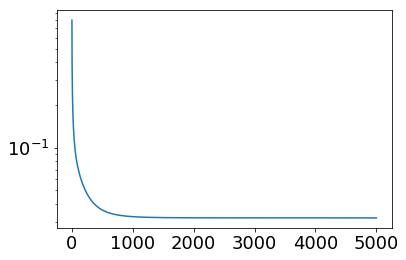

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(epochs[:len(losss)], losss)
plt.yscale("log")

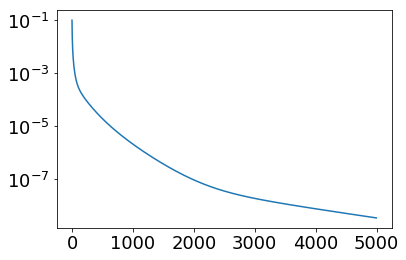

In [10]:
plt.semilogy(diff_losss)

In [ ]:
print(model.x)

In [11]:
import scipy
import numpy

def ridge_svd(X, y, alpha, cutoff = 1e-10):
    N1, N2 = X.shape
    U, s, Vt = scipy.linalg.svd(X, full_matrices=False)
    Nm = s.size
    idx = s > cutoff * s[0]
    s_nnz = s[idx][:, numpy.newaxis]
    UTy = numpy.dot(U.T, y)
    d = numpy.zeros((Nm,1), dtype=X.dtype)
    d[idx] = s_nnz / (s_nnz ** 2 + alpha)
    d_UT_y = d.reshape((Nm,)) * UTy.reshape((Nm,))
    return numpy.dot(Vt.T, d_UT_y)

In [12]:
x_corr = ridge_svd(A.numpy(), y.numpy(), alpha)

In [13]:
x_corr - model.x

<tf.Tensor: id=470029, shape=(100,), dtype=float64, numpy=
array([ 6.83309585e-03, -1.34392523e-03, -5.65233824e-03,  2.74337177e-03,
       -1.61043009e-03,  2.73610752e-03, -1.73110657e-03,  9.38828674e-03,
        4.72523083e-03,  1.57804988e-03, -2.16891450e-03,  4.60498746e-03,
       -7.95832773e-03,  4.12422400e-03, -1.15274265e-03,  6.74771099e-04,
       -3.03590460e-03,  4.40603795e-03,  1.35453462e-03, -7.35365686e-04,
        7.81679266e-03,  4.86560569e-03,  3.17139689e-03, -8.96710904e-03,
       -7.79958238e-04,  1.66424258e-03, -4.37966193e-03, -3.29361651e-03,
        4.42452357e-04,  5.72159233e-03, -3.74076658e-03, -8.22183051e-03,
       -4.35843874e-03, -1.05812065e-03, -2.28344188e-03, -2.01313006e-03,
       -4.20714880e-03,  2.77440018e-03, -2.68064635e-03, -7.34260163e-03,
        6.85405917e-03, -1.58448784e-03,  5.30355965e-03,  4.94677410e-04,
       -6.11565505e-03,  4.30120206e-03, -1.07448148e-02,  4.78924779e-03,
        3.17559509e-03,  6.25225489e-03, 